In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\CNNs loop liver delete\retrain 11252024'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_11_25_2024'
resolution = '10x'

WS = [[0, 0, 0, 0, 0, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [4, 6, 2, 3, 5, 1, 7], []]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
nTA = 2

Saving model metadata and classification colormap...
Max WS[2]: 7
Classnames: ['PDAC', 'bile duct', 'vasculature', 'hepatocyte', 'immune', 'stroma', 'whitespace']
Creating Net metadata file...


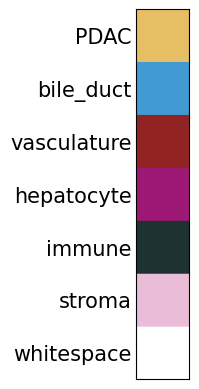

In [3]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [4]:
WSI2tif(pth, resolution, umpix)

1 / 6 processing: Liv-17_0081
2 / 6 processing: Liv-17_0001
3 / 6 processing: Liv-17_0199
4 / 6 processing: Liv-17_0161
5 / 6 processing: Liv-17_0121
6 / 6 processing: Liv-17_0041


In [ ]:
# Determine optimal TA
determine_optimal_TA(pthim, nTA)

In [5]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 6: Liv-17_0199
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.3125133514404297 seconds
 Creating file...
  Calculating TA image
   No TA cutoff found, using default value
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 366 seconds.
Image 2 of 6: Liv-17_0081
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.2500128746032715 seconds
 Creating file...
  Calculating TA image
   No TA cutoff found, using default value
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 372 seconds.
Image 3 of 6: Liv-17_0041
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.35936999320983887 seconds
 Creating file...
  Calculating TA image
   No TA cutoff found, u

In [6]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 582447500.0 pixels of PDAC, 49% of the most common class.
 There are 33972500.0 pixels of bile duct, 2% of the most common class.
 There are 95198400.0 pixels of vasculature, 8% of the most common class.
 There are 1168946200.0 pixels of hepatocyte. This is the most common class.
 There are 33117400.0 pixels of immune, 2% of the most common class.
 There are 833286300.0 pixels of stroma, 71% of the most common class.
 There are 739099800.0 pixels of whitespace, 63% of the most common class.

Building training tiles...
Total time elapsed for the while loop: 350.16430139541626
Saving big tiles
  1 of 15 training images completed in 6 minutes
  Used 315.3% counts and 40.8% unique annotations of PDAC
  Used 191.4% counts and 32.8% unique annotations of bile duct
  Used 215.3% counts and 29.2% unique annotations of vasculature
  Used 299.3% counts and 33.8% unique annotations of hepatocyte
  Used 223.7% counts and 39.

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 814s 1s/step - loss: 0.1910 - accuracy: 0.9319 - val_loss: 0.1603 - val_accuracy: 0.9464
Epoch 2/8
500/500 [==============================] - 470s 937ms/step - loss: 0.0954 - accuracy: 0.9641 - val_loss: 0.1085 - val_accuracy: 0.9606
Epoch 3/8
500/500 [==============================] - 224s 448ms/step - loss: 0.0629 - accuracy: 0.9754 - val_loss: 0.0815 - val_accuracy: 0.9697
Epoch 4/8
500/500 [==============================] - 222s 442ms/step - loss: 0.0481 - accuracy: 0.9807 - val_loss: 0.0814 - val_accuracy: 0.9701
Epoch 5/8
500/500 [==============================] - 222s 444ms/step - loss: 0.0413 - accuracy: 0.9831 - val_loss: 0.0693 - val_accuracy: 0.9747
Epoch 6/8
500/500 [==============================] - 234s 468ms/step - loss: 0.0381 - accuracy: 0.9843 - val_loss: 0.0739 - val_accuracy: 0.9731
Epoch 7/8
50

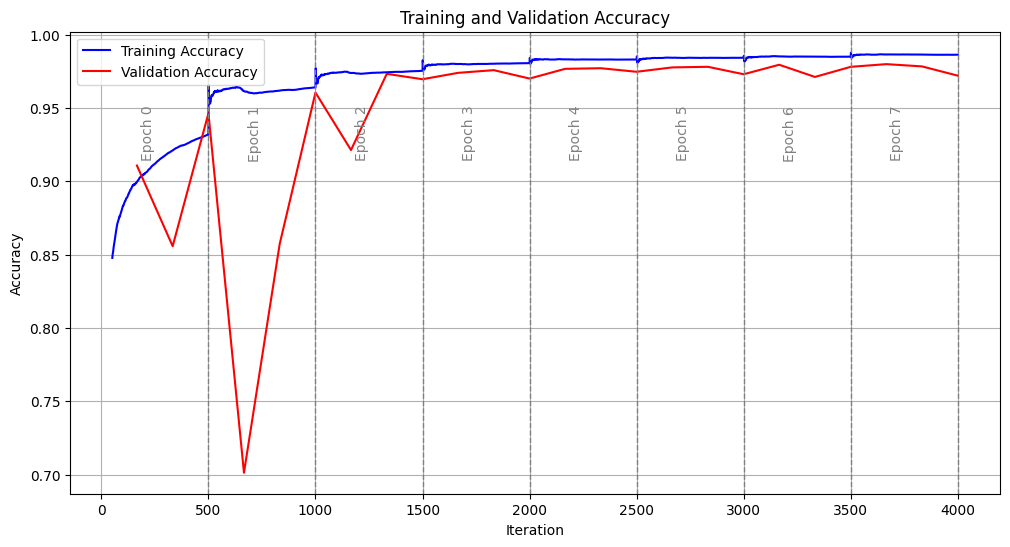

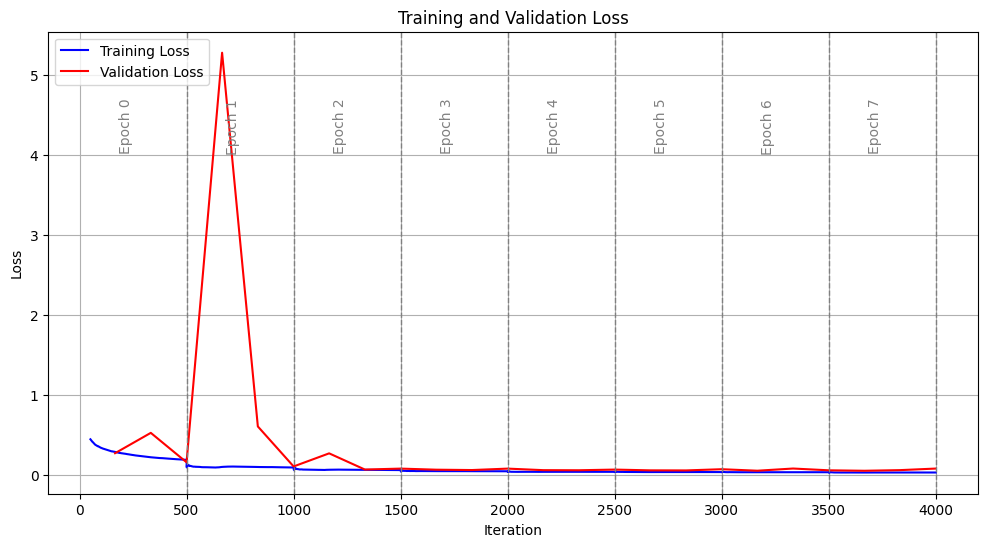

In [3]:
train_segmentation_model_cnns(pthDL)

1 / 1 processing: Liv-17_0101
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: Liv-17_0101
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 3.1724843978881836 seconds
 Creating file...
  Calculating TA image
   No TA cutoff found, using default value
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 379 seconds.
   
  Starting classification of image 1 of 1: Liv-17_0101.tif
Image 1 of 1 took 191 s
  Total time for classification: 0.0h 4.0m 32.074174642562866s


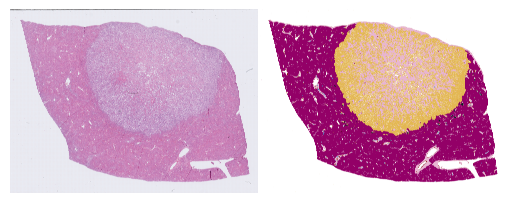


Calculating total number of pixels in the testing dataset...
  There are 372155 pixels of PDAC, 32% of the most common class.
  There are 23079 pixels of bile duct, 2% of the most common class.
  There are 20102 pixels of vasculature, 1% of the most common class.
  There are 1132115 pixels of hepatocyte. This is the most common class.
  There are 14449 pixels of immune, 1% of the most common class.
  There are 313420 pixels of stroma, 27% of the most common class.
  There are 781239 pixels of whitespace, 69% of the most common class.

  Only 14449 testing pixels of immune found.
    We suggest a minimum of 15,000 pixels for a good assessment of model accuracy.
    Confusion matrix may be misleading.


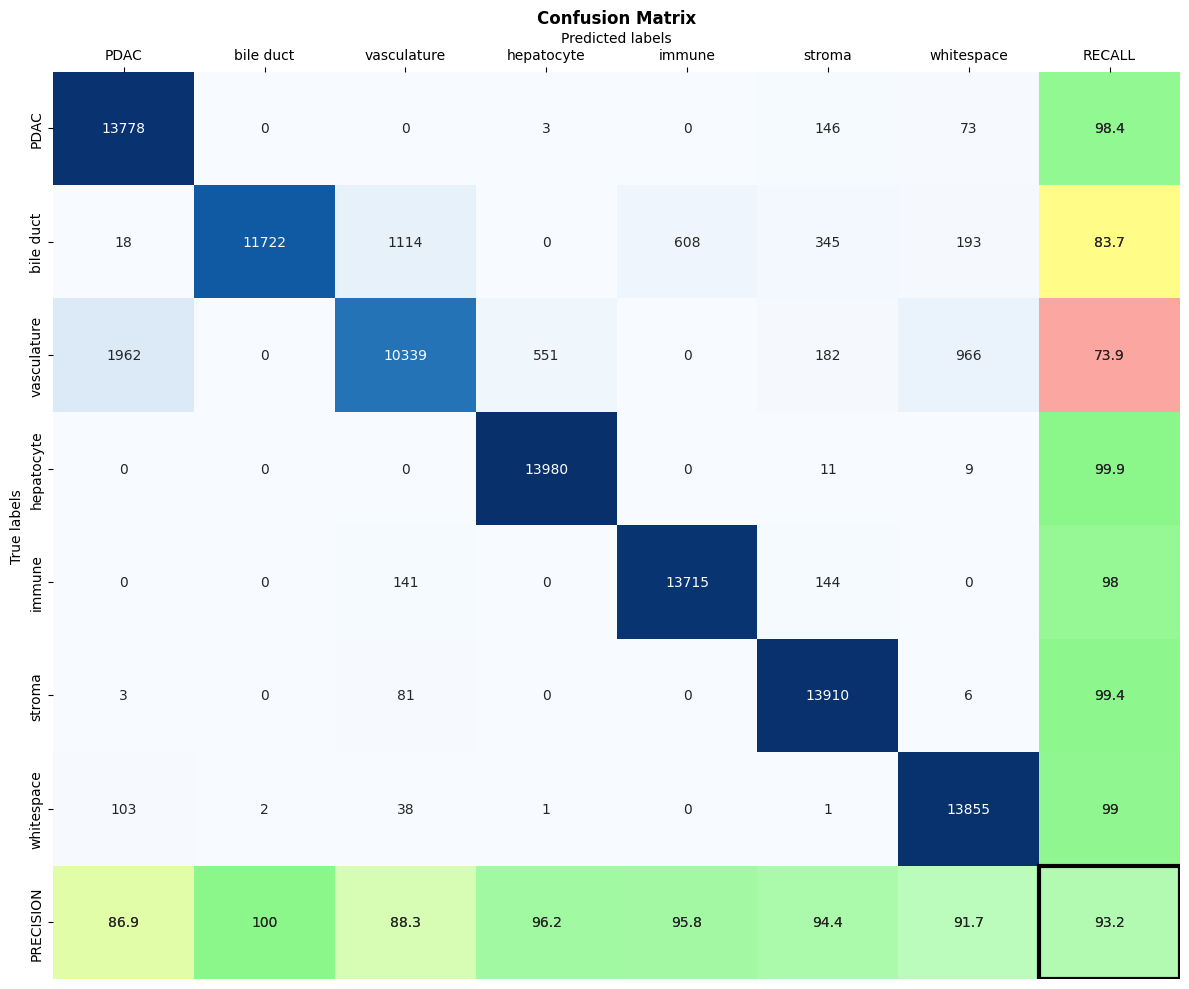


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\CNNs loop liver delete\retrain 11252024\CODA_python_11_25_2024\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 93.2%


In [3]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

In [ ]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")